<a href="https://colab.research.google.com/github/SarankanT/MSCI-436-Final-Project/blob/main/MSCI_436_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Executive Summary

Our end user is a landscaping company seeking to launch an advertising campaign in a specific neighborhood in Ames, Iowa.

Our objective for this campaign is to analyze various characteristics of houses in that neighborhood in order to anticipate the impact or potential increase in their value.

We will examine the correlations between specific house characteristics and their corresponding prices. This analysis will help us determine whether services offered by our landscaping company, such as adding a pool or fence, have the potential to enhance the value of a house.

# 2. Install & Import Packages

## 2.1 Install Streamlit and localtunnel

In [262]:
!pip install -q streamlit
!npm install localtunnel

npm WARN saveError ENOENT: no such file or directory, open '/content/package.json'
npm WARN enoent ENOENT: no such file or directory, open '/content/package.json'
npm WARN content No description
npm WARN content No repository field.
npm WARN content No README data
npm WARN content No license field.

+ localtunnel@2.0.2
updated 1 package and audited 36 packages in 0.837s

3 packages are looking for funding
  run `npm fund` for details

found 0 vulnerabilities



## 2.2 Import packages

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

from pandas import read_csv
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# 3. Load Data

In [281]:
train_data = pd.read_csv("train.csv")
train_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [282]:
test_data = pd.read_csv("test.csv")
test_data.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal


# 4. Clean & Manipulate Data

For the advertising campaign the key features we will be investigating are:

*   Roof style
*   Exterior Quality
*   Rating of basement finished area
*   Heating quality and condition
*   Kitchen quality
*   Fireplace quality
*   Garage Quality
*   Fence quality
*   Year sold
*   Sale Price

## 4.1 Clean Train Data

write a sentence about why we are cleaning the data this way

In [283]:
# Clean Train Data
train_data = train_data.select_dtypes(include = ['float64', 'int64', 'bool_', 'object']).fillna('0')

# Remove columns that we don't need
train_data.drop(columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street' , 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                           'OverallQual', 'OverallCond', 'YearBuilt', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
                           'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                           'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',  'GarageArea',  'PavedDrive',
                           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'Neighborhood', 'ExterCond', 'GarageCond', 'PoolArea', 'PoolQC'],
                 axis = 1, inplace = True)

train_data.columns

Index(['Id', 'YearRemodAdd', 'RoofStyle', 'ExterQual', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'Fence',
       'YrSold', 'SalePrice'],
      dtype='object')

In [284]:
# New train table
train_data.tail()

,Id,YearRemodAdd,RoofStyle,ExterQual,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageQual,Fence,YrSold,SalePrice
1455,1456,2000,Gable,TA,Unf,Ex,TA,TA,TA,0,2007,175000
1456,1457,1988,Gable,TA,ALQ,TA,TA,TA,TA,MnPrv,2010,210000
1457,1458,2006,Gable,Ex,GLQ,Ex,Gd,Gd,TA,GdPrv,2010,266500
1458,1459,1996,Hip,TA,GLQ,Gd,Gd,0,TA,0,2010,142125
1459,1460,1965,Gable,Gd,BLQ,Gd,TA,0,TA,0,2008,147500


## 4.2 Clean Test Data

write a sentence about why we are cleaning the data this way

In [285]:
# Clean Test Data
test_data = test_data.select_dtypes(include = ['float64', 'int64', 'bool_', 'object']).fillna(0)

# Remove columns that we don't need
test_data.drop(columns = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street' , 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
                           'OverallQual', 'OverallCond', 'YearBuilt', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinSF1',
                           'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
                           'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',  'GarageArea',  'PavedDrive',
                           'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'MiscFeature', 'MiscVal', 'MoSold', 'SaleType', 'SaleCondition', 'Neighborhood', 'ExterCond', 'GarageCond', 'PoolArea', 'PoolQC'],
                 axis = 1, inplace = True)

test_data.columns

Index(['Id', 'YearRemodAdd', 'RoofStyle', 'ExterQual', 'BsmtFinType1',
       'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual', 'Fence',
       'YrSold'],
      dtype='object')

In [286]:
# New test table
test_data.tail()

,Id,YearRemodAdd,RoofStyle,ExterQual,BsmtFinType1,HeatingQC,KitchenQual,FireplaceQu,GarageQual,Fence,YrSold
1454,2915,1970,Gable,TA,Unf,Gd,TA,0,0,0,2006
1455,2916,1970,Gable,TA,Rec,TA,TA,0,TA,0,2006
1456,2917,1996,Gable,TA,ALQ,Ex,TA,TA,TA,0,2006
1457,2918,1992,Gable,TA,GLQ,TA,TA,0,0,MnPrv,2006
1458,2919,1994,Gable,TA,LwQ,Ex,TA,TA,TA,0,2006


## 4.3 Manipulate Dataframe

First we will utilize the "Year Sold" feature to accommodate inflation adjustments for 2023.

<Axes: title={'center': 'Year Sold vs. Sale Price'}, xlabel='YrSold', ylabel='SalePrice'>

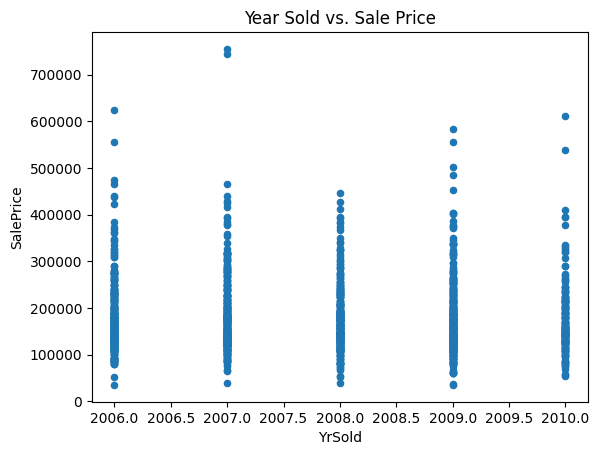

In [287]:
# Plot of Year Sold Vs. Sale Price
train_data.plot.scatter(x = 'YrSold', y = 'SalePrice', title = "Year Sold vs. Sale Price")

We observe that houses were exclusively sold between 2006 and 2010. We can incorporate an inflation adjustments specific to these years when considering prices for 2023.

From our [research](https://www.in2013dollars.com/us/inflation/2006?amount=1):

*   \$1 in 2006 is worth \$1.51 in 2023

*   \$1 in 2007 is worth \$1.47 in 2023

*   \$1 in 2008 is worth \$1.41 in 2023

*   \$1 in 2009 is worth \$1.42 in 2023

*   \$1 in 2010 is worth \$1.39 in 2023

In [288]:
# Adjust the sale price based on inflation
#train_data['SalePrice'] = train_data['SalePrice'].apply(lambda x: x*1.51 if train_data['YearSold'] == 2006 else x)

#train_data['SalePrice'].replace
#where yearsold = 2006 --> saleprice = saleprice * 1.6


In [289]:
# Rename columns
train_data.columns = ['Id', 'YearRemodelled', 'RoofStyle', 'ExteriorQuality', 'BasementFinish', 'HeatingQuality', 'KitchenQuality', 'FireplaceQuality', 'GarageQuality', 'FenceQuality', 'YearSold', 'SalePrice']
#test_data.columns = ['Id', 'YearRemodelled', 'RoofStyle', 'ExteriorQuality', 'BasementQuality', 'KitchenQuality', 'FireplaceQuality', 'GarageQuality', 'FenceQuality', 'YearSold']


In [290]:
# Check for nulls
print(train_data.isnull().sum())

Id                  0
YearRemodelled      0
RoofStyle           0
ExteriorQuality     0
BasementFinish      0
HeatingQuality      0
KitchenQuality      0
FireplaceQuality    0
GarageQuality       0
FenceQuality        0
YearSold            0
SalePrice           0
dtype: int64


# 5. Plotting the correlations of Features vs. Sale Price


## 5.1 Plotting the correlations

To obtain a general overview of the data, we plotted the correlations between the features and the Sale Price.

<Axes: title={'center': 'Fence Quality vs. Sale Price'}, xlabel='FenceQuality', ylabel='SalePrice'>

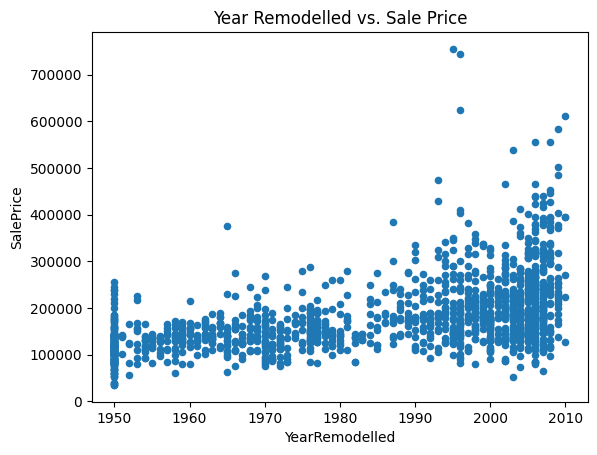

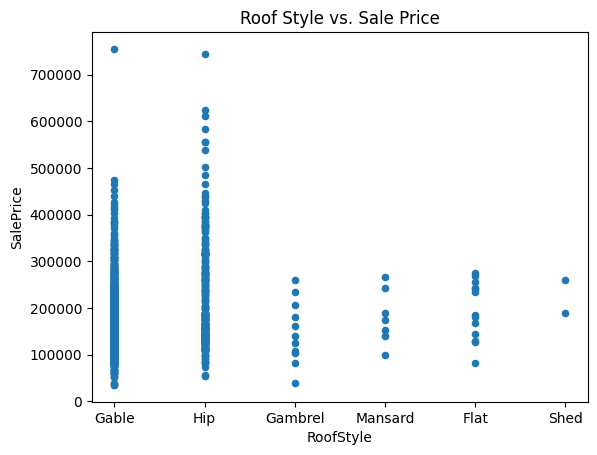

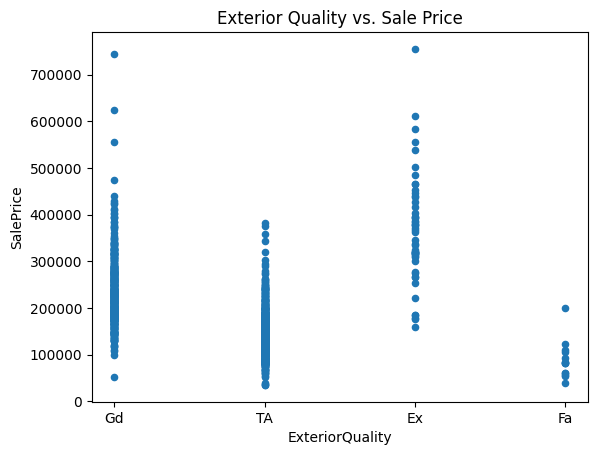

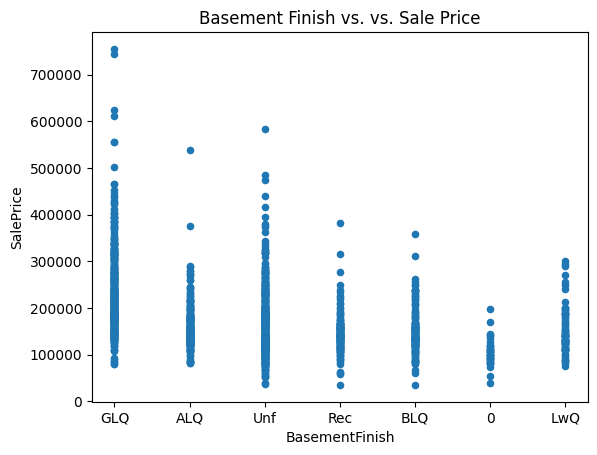

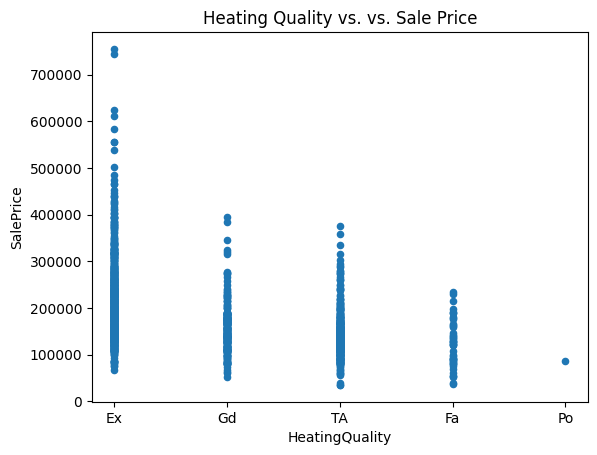

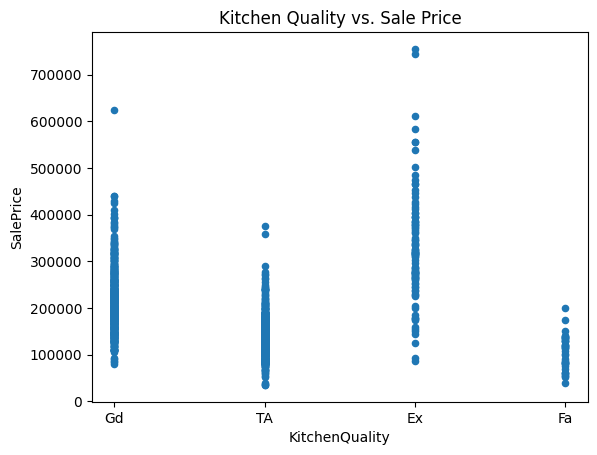

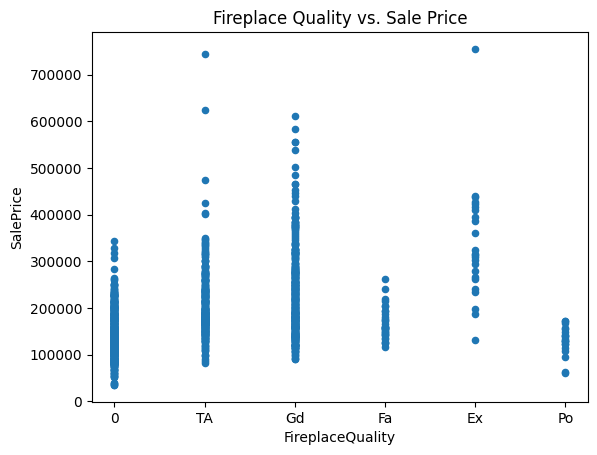

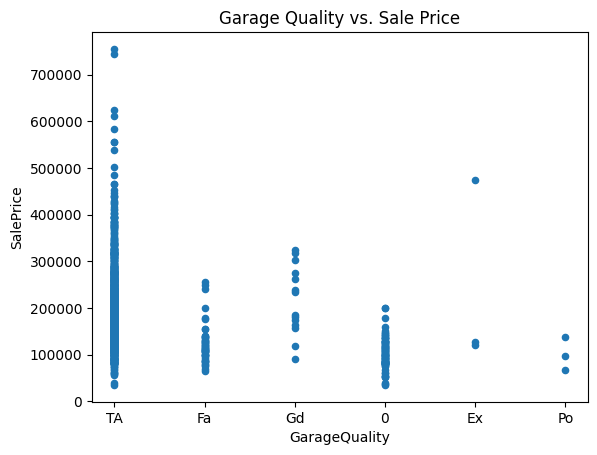

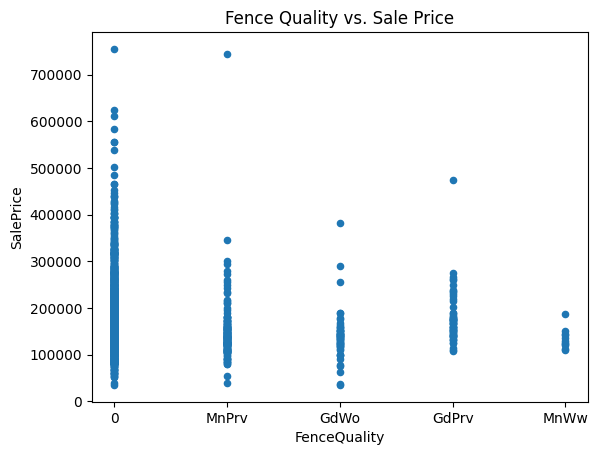

In [291]:
# Plotting the correlations
train_data.plot.scatter(x = 'YearRemodelled', y = 'SalePrice', title = 'Year Remodelled vs. Sale Price')
train_data.plot.scatter(x = 'RoofStyle', y = 'SalePrice', title = 'Roof Style vs. Sale Price')
train_data.plot.scatter(x = 'ExteriorQuality', y = 'SalePrice', title = 'Exterior Quality vs. Sale Price')
train_data.plot.scatter(x = 'BasementFinish', y = 'SalePrice', title = 'Basement Finish vs. vs. Sale Price')
train_data.plot.scatter(x = 'HeatingQuality', y = 'SalePrice', title = 'Heating Quality vs. vs. Sale Price')
train_data.plot.scatter(x = 'KitchenQuality', y = 'SalePrice', title = 'Kitchen Quality vs. Sale Price')
train_data.plot.scatter(x = 'FireplaceQuality', y = 'SalePrice', title = 'Fireplace Quality vs. Sale Price')
train_data.plot.scatter(x = 'GarageQuality', y = 'SalePrice', title = 'Garage Quality vs. Sale Price')
train_data.plot.scatter(x = 'FenceQuality', y = 'SalePrice', title = 'Fence Quality vs. Sale Price')

## 5.2 Change datatypes from an object to an integer

In [292]:
# Year Remodelled is already in a integer datatype
# Roof Style
train_data['RoofStyle'].replace(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], [1,2,3,4,5,6], inplace = True)
# Exterior Quality
train_data['ExteriorQuality'].replace(['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5], inplace = True)
# Basement Quality
train_data['BasementFinish'].replace(['0', 'GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'], [0,7,6,5,4,3,2,1], inplace = True)
# Heating Quality
train_data['HeatingQuality'].replace(['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5], inplace = True)
# Kitchen Quality
train_data['KitchenQuality'].replace(['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5], inplace = True)
# Fireplace Quality
train_data['FireplaceQuality'].replace(['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5], inplace = True)
# Garage Quality
train_data['GarageQuality'].replace(['0', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], [0,1,2,3,4,5], inplace = True)
# Fence Quality
train_data['FenceQuality'].replace(['0', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], [0,1,2,3,4], inplace = True)

In [293]:
# Check train_data datatypes
print(train_data.dtypes)

Id                  int64
YearRemodelled      int64
RoofStyle           int64
ExteriorQuality     int64
BasementFinish      int64
HeatingQuality      int64
KitchenQuality      int64
FireplaceQuality    int64
GarageQuality       int64
FenceQuality        int64
YearSold            int64
SalePrice           int64
dtype: object


# 6. Split Data

We acknowledge that the test_data does not contain the Sale Price feature. Therefore, we will divide the data using a 70/30 split, enabling us to perform error testing and evaluate the model's accuracy.

In [313]:
X = train_data.iloc[:,1:]
y = train_data.iloc[:, 0]

# Split X and y into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 7. Linear Regression Model

In [322]:
# Linear Regression Model
regression = LinearRegression().fit(X_train, y_train)
y_pred = regression.predict(X_test)
coef = regression.coef_
intercept = regression.intercept_

print('Linear regression coefficients : ')
i = 0;
for col in X.columns:
  print(col, ":", coef[i])
  i = i + 1
print('')

print(f'Linear regression y-intercept = {intercept}')
print('')

Linear regression coefficients : 
YearRemodelled : -1.0946687537539266
RoofStyle : 8.687764470085195
ExteriorQuality : 31.60672111579807
BasementFinish : 0.06637141346208124
HeatingQuality : -5.021947206167385
KitchenQuality : 29.891886792839696
FireplaceQuality : 4.3013767689310765
GarageQuality : 4.438986420571329
FenceQuality : -1.7331391055517078
YearSold : 4.065275492579925
SalePrice : -0.0003138984409893908

Linear regression y-intercept = -5416.453587036039



# 8. Error Test Data

In [321]:
#Calculate the MSE and R^2 values
mse_test = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Linear regression MSE = ', mse_test, '\n')
print('Linear regression R2 = ', r2, '\n')

Linear regression MSE =  177630.73235565188 

Linear regression R2 =  -0.0068858530055013745 



Not a good R^2 value sentence

# 9. Create a streamlit app example

## 9.1 Writing the streamlit file

In [324]:
%%writefile app.py
# Cheatsheet available at https://docs.streamlit.io/library/cheatsheet

import streamlit as st
import pandas as pd

st.set_page_config(layout="wide")

st.title('Welcome to our MSCI 436 Project!')
st.write("We are Team 11 (Anika, Ismael, Sarankan & Stuart).")
st.write("Our purpose")

data = pd.read_csv('train.csv')



Overwriting app.py


## 9.2 Run the app and keep logs

In [317]:
!streamlit run /content/app.py &>/content/logs.txt &

In [318]:
!curl ipv4.icanhazip.com
!npx localtunnel --port 8501

34.23.74.254
npx: installed 22 in 5.415s
your url is: https://warm-eyes-divide.loca.lt
^C
